## Titanic

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
df =sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
#필요한 컬럼만 가져오기
df=df[['survived','pclass','sex','age','sibsp','parch','fare','embarked','who','deck']]
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,deck
886,0,2,male,27.0,0,0,13.00,S,man,NaN
887,1,1,female,19.0,0,0,30.00,S,woman,B
888,0,3,female,NaN,1,2,23.45,S,woman,NaN
889,1,1,male,26.0,0,0,30.00,C,man,C
890,0,3,male,32.0,0,0,7.75,Q,man,NaN


In [6]:
# age는 평균으로 대체
# 단 , Who column이 결측치가 없으므로 어른은 어른나이 평균,아동은 아동나이 평균으로 대체
adult =df[df.who.isin(['man','woman'])]
child =df[df.who == 'child']
adult.shape,child.shape

((808, 10), (83, 10))

In [7]:
df.age.fillna(adult.age.mean().round(1),inplace=True)
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,deck
886,0,2,male,27.0,0,0,13.00,S,man,NaN
887,1,1,female,19.0,0,0,30.00,S,woman,B
888,0,3,female,32.8,1,2,23.45,S,woman,NaN
889,1,1,male,26.0,0,0,30.00,C,man,C
890,0,3,male,32.0,0,0,7.75,Q,man,NaN


In [8]:
df.embarked.value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [9]:
df.embarked.fillna('S',inplace=True)
df.embarked.isna().sum()

0

In [10]:
# deck 컬럼 삭제 (결측치가 너무 많아서), Who 컬럼도 삭제 (age와 중복)
df.drop(columns=['deck','who'],inplace=True)

In [11]:
# 성별 embarked 을 숫자로 변환
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df.sex =le.fit_transform(df.sex)
df.embarked = le.fit_transform(df.embarked)
df.tail(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
888,0,3,0,32.8,1,2,23.45,2
889,1,1,1,26.0,0,0,30.00,0
890,0,3,1,32.0,0,0,7.75,1


In [12]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [13]:
df_std =StandardScaler().fit_transform(X)

In [14]:
df_cov =np.dot(df_std.T,df_std) / (len(df_std)-1)
df_cov

array([[ 1.0011236 ,  0.13204869, -0.31380878,  0.08317471,  0.01846339,
        -0.55011704,  0.16227994],
       [ 0.13204869,  1.0011236 ,  0.0891079 , -0.11475961, -0.24576479,
        -0.1825377 ,  0.10838385],
       [-0.31380878,  0.0891079 ,  1.0011236 , -0.23003875, -0.19036046,
         0.08170055, -0.04115212],
       [ 0.08317471, -0.11475961, -0.23003875,  1.0011236 ,  0.41530381,
         0.15983043,  0.06830695],
       [ 0.01846339, -0.24576479, -0.19036046,  0.41530381,  1.0011236 ,
         0.21646789,  0.03984311],
       [-0.55011704, -0.1825377 ,  0.08170055,  0.15983043,  0.21646789,
         1.0011236 , -0.22497186],
       [ 0.16227994,  0.10838385, -0.04115212,  0.06830695,  0.03984311,
        -0.22497186,  1.0011236 ]])

In [15]:
np.cov(df_std.T)

array([[ 1.0011236 ,  0.13204869, -0.31380878,  0.08317471,  0.01846339,
        -0.55011704,  0.16227994],
       [ 0.13204869,  1.0011236 ,  0.0891079 , -0.11475961, -0.24576479,
        -0.1825377 ,  0.10838385],
       [-0.31380878,  0.0891079 ,  1.0011236 , -0.23003875, -0.19036046,
         0.08170055, -0.04115212],
       [ 0.08317471, -0.11475961, -0.23003875,  1.0011236 ,  0.41530381,
         0.15983043,  0.06830695],
       [ 0.01846339, -0.24576479, -0.19036046,  0.41530381,  1.0011236 ,
         0.21646789,  0.03984311],
       [-0.55011704, -0.1825377 ,  0.08170055,  0.15983043,  0.21646789,
         1.0011236 , -0.22497186],
       [ 0.16227994,  0.10838385, -0.04115212,  0.06830695,  0.03984311,
        -0.22497186,  1.0011236 ]])

In [16]:
eig_vals,eig_vecs =np.linalg.eig(df_cov)
eig_vals

array([1.85238239, 1.71838265, 0.36975002, 0.97849351, 0.56037968,
       0.68928838, 0.83918854])

In [17]:
PC1 = np.dot(df_std,eig_vecs[:,:1])
PC2 =np.dot(df_std,eig_vecs[:,1:2])

In [18]:
pca =PCA(n_components=2)
df_pca =pca.fit_transform(df_std)
pca.explained_variance_ratio_,sum(pca.explained_variance_ratio_)

(array([0.26432906, 0.24520772]), 0.5095367779956597)

In [20]:
df_df = pd.DataFrame(df_pca,columns=['PC1','PC2'])
df_df['survived'] = y
df_df.head()

,PC1,PC2,survived
0,-1.260268,0.656886,0
1,2.283525,-1.106072,1
2,-0.678950,0.425341,1
3,1.349088,-0.459511,1
4,-1.375322,-0.323265,0


KeyError: 'PC1'

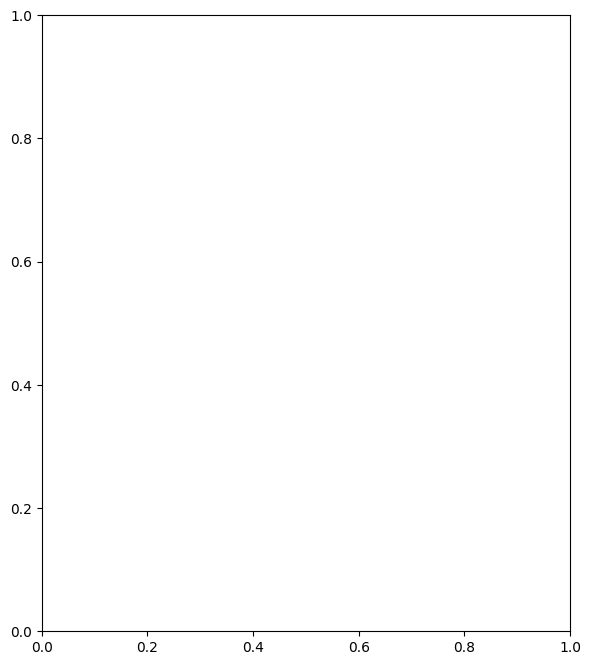

In [21]:
markers = ['^', 's', 'o']
my = ['did']      
plt.figure(figsize=(15,8))
for k,column in enumerate (['target','cluster']):
    plt.subplot(1,2,k+1)
    for i , marker in enumerate(markers):
        x_data = df[df.survived  == i]['PC1']
        y_data = df[df.survived== i]['PC2']
        if k == 0:
            plt.scatter(x_data, y_data, marker=marker, label=my[i])
        else:
            plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
            plt.scatter(x_data.mean(),y_data.mean(),marker='*',c='black',s=100)

    plt.legend()
    plt.xlabel('PC1'), plt.ylabel('PC2')
    if k == 0:
        plt.title("Original data")
    else:
        plt.title("Clustered data")

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
def pca_accuracy(X,y):
    X_train,X_test,y_train,y_test=train_test_split(
    X,y,stratify=y,test_size=0.2,random_state=2023
    )
    rfc =RandomForestClassifier(random_state=2023)
    rfc.fit(X_train,y_train)
    score=rfc.score(X_test,y_test)
    return score

In [ ]:
#2차원 4차원 6차원
for n in[2,4,6]:
    pca = PCA(n_components=n)
    df_pca =pca.fit_transform(df_std)
    expplaine =sum(pca.explained_variance_ratio_)
    acc =pca_accuracy(df_pca,y)
    print(f'PCA{n}:설명력-{expplaine:.4f},정확도-{acc:.4f}')

PCA2:설명력-0.5095,정확도-0.7430
PCA4:설명력-0.7689,정확도-0.7542
PCA6:설명력-0.9472,정확도-0.7654
